# Assignment 1

## Loading data

In [1]:
from aa import DataLoader
from aa import extract_features
from aa import check_output

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/gusklezju@GU.GU.SE/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# IN THIS BOX YOU ARE ALLOWED TO ADD ANY CODE FOR SETTING UP A PYTORCH DEVICE
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
dataset = DataLoader(data_dir="../DDI_Corpus", device=device)

dataframes are ready


In [4]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
0,DDI-MedLine.d203.s16,155,0,5,test
1,DDI-MedLine.d203.s16,156,7,13,test
2,DDI-MedLine.d203.s16,157,15,17,test
3,DDI-MedLine.d203.s16,158,19,24,test
4,DDI-MedLine.d203.s16,15,26,27,test


In [5]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
0,DDI-MedLine.d203.s0,1,54,68
1,DDI-MedLine.d203.s1,1,129,143
2,DDI-MedLine.d203.s5,1,68,82
3,DDI-MedLine.d203.s6,1,0,8
4,DDI-MedLine.d203.s6,1,10,18


In [6]:
dataset.vocab[:15]

['potential',
 'underuse',
 'overuse',
 'and',
 'inappropriate',
 'use',
 'of',
 'antidepressants',
 'in',
 'older',
 'veteran',
 'nursing',
 'home',
 'residents',
 'to']

In [7]:
dataset.id2ner

{1: 'group', 2: 'drug_n', 3: 'drug', 4: 'brand'}

In [8]:
dataset.max_sample_length

102

In [9]:
dataset.get_random_sample()

/home/gusklezju@GU.GU.SE/machine_learning/lt2316-h20-aa/aa/data_loading.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_tokens["token"] = sample_tokens.loc[:,"token_id"].apply(decode_word)


'the renal effects of nephrotoxic compounds may be potentiated by DRUG:carboplatin'

### Data Exploration

split df
got y


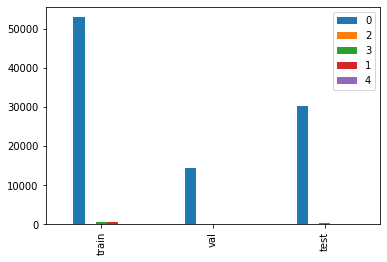

In [10]:
dataset.plot_split_ner_distribution()

### Labels

In [16]:
train_y, val_y, test_y = check_output(dataset.get_y())

split df
got y


## Extracting Features

In [11]:
train_X, val_X, test_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length,
                                                        id2w = dataset.id2word
                                                       ))

## Bonus Part: Explore Some more

In [ ]:
#uncomment the code below if you want to do bonus part

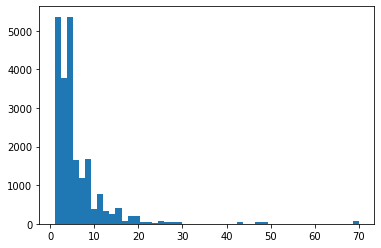

In [12]:
dataset.plot_ner_per_sample_distribution()

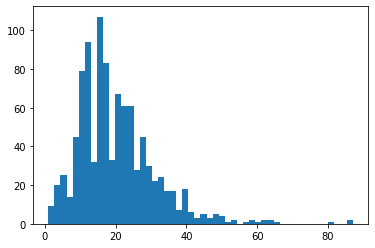

In [13]:
dataset.plot_sample_length_distribution()

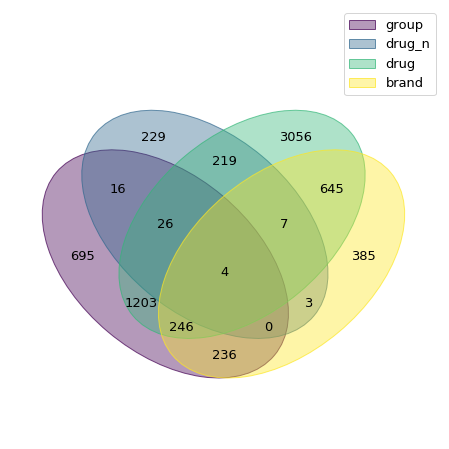

In [14]:
dataset.plot_ner_cooccurence_venndiagram()